# Foundations of Neural Networks
Lab Author: Calvin Josenhans and Gautam Hari

## About
The aim of this lab is to hopefully provide you with a better understanding of the mechanisms at the heart of machine learning and artificial intelligence, Neural Networks.

# Neural Networks? How is this Machine Learning?

<img src=".\images\Neural-Networks-Position.png" alt="Where does Neural Networks lie in the field of AI?" width="500"/>

It is important to note that the names you hear thrown around such as Artifical intelligence, Machine Learning and Deep Learning are all interconected with each other. As seen the the image, Artifical Intelligence is the broad term for a field of computer science that works with the intelligence or software(wikipidia).Machine Learning is a subfeild of Artifical intelligence that relies on "learning from past data". Deep Learning is a subsection of Machine Learning that uses Neural Networks as a backbone to function.  

# Real World Usages of Neural Networks

Neural Networks are all around us. Enabledling our daily life, from the YouTube videos you watch to the mail you get delivered. A classic example of a Neural Network in use is the USPS. Think about it: every day, the United States Postal Service delivers 420 million pieces of mail, that is a lot of addresses they need to ship to! Considering that addresses can either be printed or handwritten, there is a lot of sorting that needs to be done. But the Postal Service has a secret weapon: Neural Networks! Using the process of OCR (Optical Character Recognition), the postal service can rapidly read, grab information off of mail to store, and utilize it in sending the parcel to its final destination.





# Okay But, How Do Neural Networks Work?

Well, to talk about this, let's take an example. Imagine you worked for the United States Postal Service, and you were given the task of sorting the mail based on Zip Code. Assuming we know where the zip code was located on every different piece of mail, our challenge is to read it!

<img src=".\images\Neural_network_explain.png" alt="A Depiction of an Artificial Neural Network" width="500"/> 

The image above is a visual representation of a Neural Network. There are three major parts that you need to worry about. The Input Layer, the Hidden Layer, and the Output Layer.

In our example of the Post office, let's assume that the camera that takes the images of the numbers gets a 28X28 pixel image. So, there is a grand total of 784 pixels in the image. Translating that to our input layer means there are 784 total neurons in our input layer.

As for the Hidden layer, we will continue to keep it hidden for now. 


For our Output layer, we ultimately want to model to recognize the image as a number from 0-9, meaning we will have a total of 10 neurons in the output layer.

# The Math Behind A Neural Network

Math, you mean those made-up symbols can actually be useful? Sadly, yes, In fact, Neural Networks are really just Linear Algebra and Calculus under the hood, but I will not go into most of those equations today as they are out of the Scope of our lab.

We will just focus on some of the math behind The activation of Neurons.

# Activation?

<img src=".\images\neuron.png" alt="A Single Neuron in a neural network" width="500">


The image above zooms in onto a single neuron.

The variables $x_1, ..., x_n$ represent other neurons, the lines are the connections between the neurons, and the variables $w_1, ..., w_n$ represent the weights of the neurons.

Activation of a neuron is what determines the output based on the input of a neuron determined by the activation function $f$, which is equal to  $σ(w_1*x_1 + w_2*x*2)$. The function takes the weights and multiplies them by the neuron values. Then, we add up all the values inside and place them within a sigmoidal function, which squashes the input values between 0 and 1.

<img src=".\images\Sigmoid function.png" alt="Graphical Representation of Sigmodial Function" width="500">


Going back to our example of the Postal Service, we know that every pixel of the image has an RGB value of 0-255. In the case of Identifying Numbers, we are converting the image to grayscale and, from there, getting the grayscale value. How "grayscale" something is affects how much our neuron activates.

# Weights

What about the weights you mentioned earlier? Well, those are a bit more complicated.

To put it simiply, the weight is how much the Network values the activation of a Neuron. The weights are what the Neural Network messes with to "Learn." We will not cover how the Nueral Network does this backpropagation in-depth as the math mathematics behind it is a little out of the Scope of the lab, but for those interested, Nueral Networks work by something known as "Backpropagation." Backpropagation is what alters the weights in the model to make it more and more accurate.





# Our Own Neural Network
Let's say that we want to create a simple neural network that can tell us what color a flower will be in a field.

<img src=".\images\Meadow-with-lots-of-yellow-flowers-scaled.jpg" alt="A Depiction of an Artificial Neural Network" width="500"/> 

It turns out that we can solve this problem with the simplest possible neural network, consisting of a single neuron called a **perceptron**.

## Getting Started with Code


In [339]:
from random import random, sample

class Perceptron:
    def __init__(self, num_inputs):
        # Giving the perceptron its learning constant
        # This is a variable that controls how fast the perceptron learns
        self.c = 0.2
        self.weights = list()
        for i in range(num_inputs):
            self.weights.append(random() * 2 - 1)

    # A very simple function that decices whether the perceptron outputs a signal or not
    # Returns 1 if the number is positive, and -1 otherwise
    def activate(self, n):
        if n < 0: return -1
        return 1

    # Runs the inputs through the perceptron
    def feedforward(self, inputs):
        sum = 0
        # Multiply every input by the corresponding weight
        for i, input in enumerate(inputs):
            sum += input * self.weights[i]

        return self.activate(sum)

## Using Our Perceptron
As our perceptron is, it can already make predictions about what color flowers we will see. Our perceptron will have 3 inputs, the x and y coordinates of the flower, and a bias term.

The bias term may seem strange at first, but it begines to make sense if we think about what happens for the point (0, 0). No matter what the weights of the perceptron are, it will always output 0, which is not very useful. By adding the bias term we are able to account for this issue.

In [340]:
import matplotlib.pyplot as plt

# Plotting Function that We'll Use Later
def plot_results(inputs, outputs):
    xs = [x for (x, y, b) in inputs]
    ys = [y for (x, y, b) in inputs]

    plt.scatter(xs, ys, c=outputs, cmap='viridis')
    plt.show()


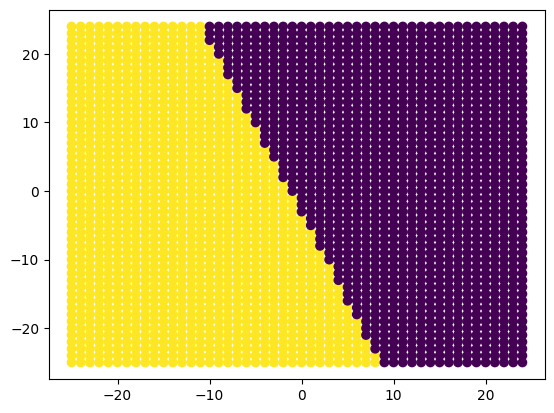

In [341]:
# Creating a perceptron with 3 inputs, an x, y and bias.
perceptron = Perceptron(3)

# There is a flower at every coordinate point
flower_locations = []
for i in range(-25, 25):
    for j in range(-25, 25):
        flower_locations.append([i, j, 1])


# Keeping track of the predictions that the perceptron makes
flower_colors = []
for loc in flower_locations:
    prediction = perceptron.feedforward(loc)
    flower_colors.append(prediction)

plot_results(flower_locations, flower_colors)


## Our Graph
Notice the linear boundary between the two colors of flowers. This is because our network only has 1 neuron (so technically it isn't a network at all!). Increasing the size of our network allows for handling more complex data as we'll see later.

# Training

Right now, our perceptron is simply guessing at a distribution of flowers. The real power comes with the ability to train the perceptron based on just a few datapoints, to learn the pattern of data distribution.

## A training algorithm
1. Provide the perceptron with inputs where there is a known answer. 
2. Ask the perceptron to guess an answer for those inputs.
3. Compute the error - i.e. how close to the correct answer was the perceptron.
4. Adjust the weights based on the error.
5. Repeat!

When we provide enough trading data, this process allows us to fine-tune the perceptron's weights to predict as accurately as possible the locations of flowers.

## Translating this algorithm into code

In [342]:
# Another method for the perceptron class
def train(self: Perceptron, inputs, answer):
    # Finding what the perceptron predicts
    guess = self.feedforward(inputs)
    # Getting how wrong we were (and in what direction)
    error = guess - answer

    # Changing the weights to be closer to the expected value
    for i in range(len(self.weights)):
        self.weights[i] += self.c * error * inputs[i]


# Assigning the method to the class
Perceptron.train = train



## But First!
Before we actually run the code to train the perceptron, let's see how our perceptron with just random weights does with predicting things.

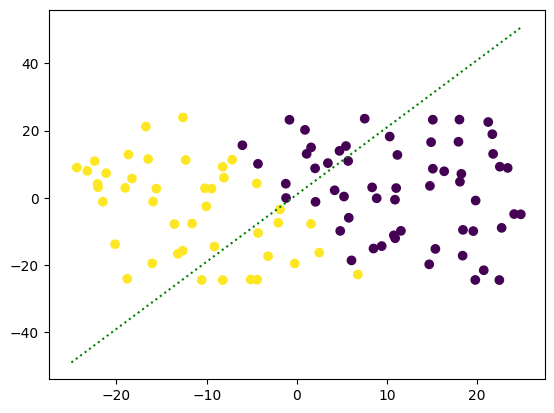

In [343]:
# Function that compares the predictions to the actual output
def evaluate():
    xs = []
    ys = []
    outputs = []
    # Guessing the color of a bunch of random flowers
    for i in range(100):
        x = random() * 50 - 25
        y = random() * 50 - 25

        xs.append(x)
        ys.append(y)
        outputs.append(perceptron.feedforward([x, y, 1]))


    plt.scatter(xs, ys, c=outputs,cmap='viridis')

    plt.plot([-25, 25], [f(-25), f(25)], color='green', marker='', linestyle='dotted')

    plt.show()

evaluate()

That's pretty bad right? But now we'll train the perceptron on all of our data.

## Actually Training
We already generated some data for our flowers, so lets just choose a few random points out of those to be our training sets: `flower_locations` (inputs) and `flower_colors` (outputs).

In [344]:
# How much training data we want to use
num_training_points = 1000

# The "true" distribution of the flowers
def f(x):
    return 2*x + 1

# Select a random portion of the points we have.
inputs = []
outputs = []

# Generating a number of points to train with
for i in range(num_training_points):
    x = random() * 50 - 25
    y = random() * 50 - 25    

    # Getting the correct output based on our function
    out = 1 if f(x) > y else -1

    inputs.append((x,y,1))
    outputs.append(out)

# Training our perceptron
for i in range(len(inputs)):
    perceptron.train(inputs[i], outputs[i])

# Testing how we did
Let's compare the predictions of our perceptron to the line y=2x + 1 that represents the actual distribution we're aiming for.

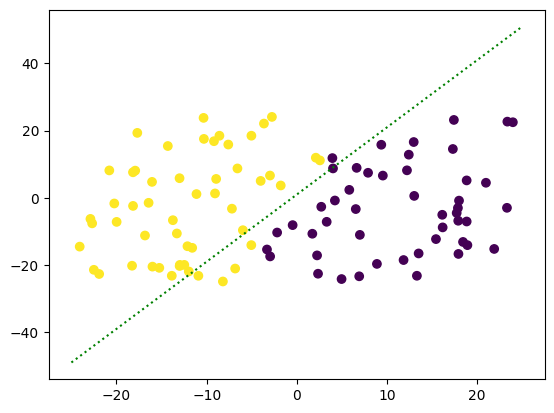

In [345]:
# Calling the function to display our results
evaluate()

Much closer right?

If you want, you can even run the code block again to generate some more data, and you should see the predictions get even closer to the actual line.

# Conclusion
We looked at how neural networks work by seeking to model human neurons.

We then created and trained our own perceptron to predict the color of flowers in a field.

Although this model is extremely simple, by connecting perceptrons together it's possible to train neural networks to model and predict much more complex phenomena. Hopefully by walking through this example, you have a better sense of what is going on at the very core of one of the most important tools in machine learning.

# Sources
- https://natureofcode.com/book/chapter-10-neural-networks/
- https://en.wikipedia.org/wiki/Machine_learning#Model_assessments
- https://en.wikipedia.org/wiki/Artificial_neural_network
# Images
- https://stats.stackexchange.com/questions/487249/       why-is-learning-slower-for-a-sigmoid-activation-function-in-a-neural-network
- https://medium.com/@silvaan/what-is-the-difference-between-artificial-intelligence-machine-learning-and-deep-learning-71ec27ea5a2a

